In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [45]:
df = pd.read_csv("data/data_merge.csv")

In [46]:
num_columns = [col for col in df.columns if df[col].dtype != "object"]
cat_columns = [col for col in df.columns if df[col].dtype == "object"]

In [47]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import  StandardScaler,OneHotEncoder,FunctionTransformer
# from sklearn.decomposition import PCA,TruncatedSVD
# from sklearn.pipeline import Pipeline
# from sklearn.manifold import TSNE

# std = StandardScaler()
# ohe= OneHotEncoder(sparse_output=False)

# log_1p = FunctionTransformer(func=np.log1p)
# preprocessor_pca = ColumnTransformer(
#     transformers=[
#         ("ohe",ohe,cat_columns),
#         ("log",log_1p,num_columns)
#     ]
    
# )
# tsne=Pipeline([
#      ('preprocessor', preprocessor_pca),
#      ('std', std ),
#      ("tsne", TSNE(n_components=3,random_state=42,verbose=2,n_jobs=-1))
# ])

# tsne_value = tsne.fit_transform(df)

In [48]:
import pickle
# pickle_out = open("tsne.pkl", "wb") 
# pickle.dump(tsne_value, pickle_out) 
# pickle_out.close()
pickle_in = open('tsne.pkl', 'rb') 
tsne_value = pickle.load(pickle_in)

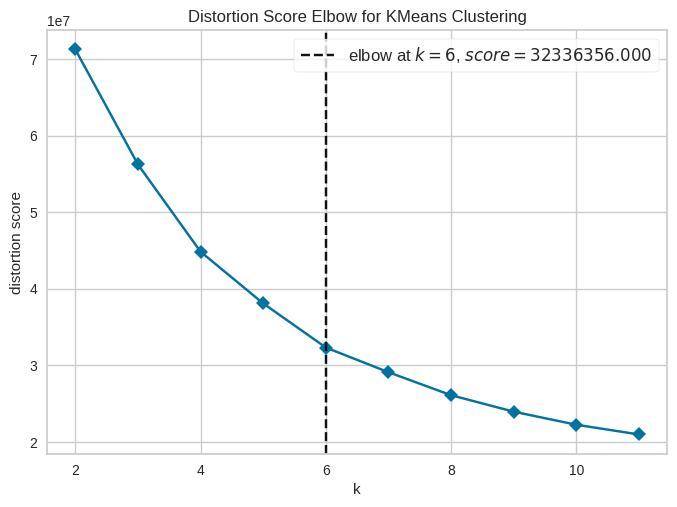

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(n_init=10,random_state=42),metric="distortion", k=(2,12),timings=False)

visualizer.fit(tsne_value)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [50]:
kmeans = KMeans(n_clusters=6,n_init=10,random_state=42)
kmeans.fit(tsne_value)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [51]:
df["label"]=kmeans.labels_

{0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b', 6: '#e377c2', 7: '#7f7f7f', 8: '#bcbd22', 9: '#17becf'}


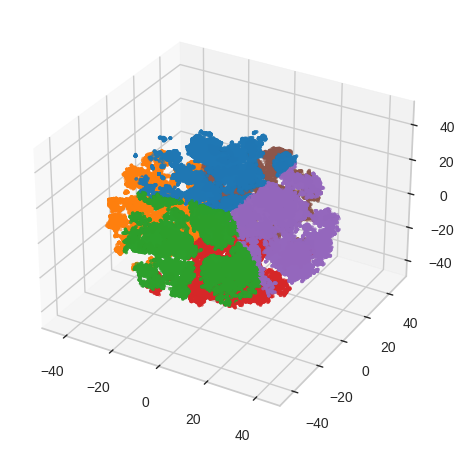

In [53]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.colors as mcolors

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Créer une liste de couleurs à partir de la palette "Set1" de Matplotlib
set1_colors = list(mcolors.TABLEAU_COLORS.values())[:10]

# Créer un dictionnaire pour mapper des couleurs aux valeurs de la liste
color_dict = {i: set1_colors[i] for i in range(len(set1_colors))}


ax.scatter3D(tsne_value[:,0],tsne_value[:,1],tsne_value[:,2],marker=".",c=[color_dict[i] for i in df["label"]])
plt.show()

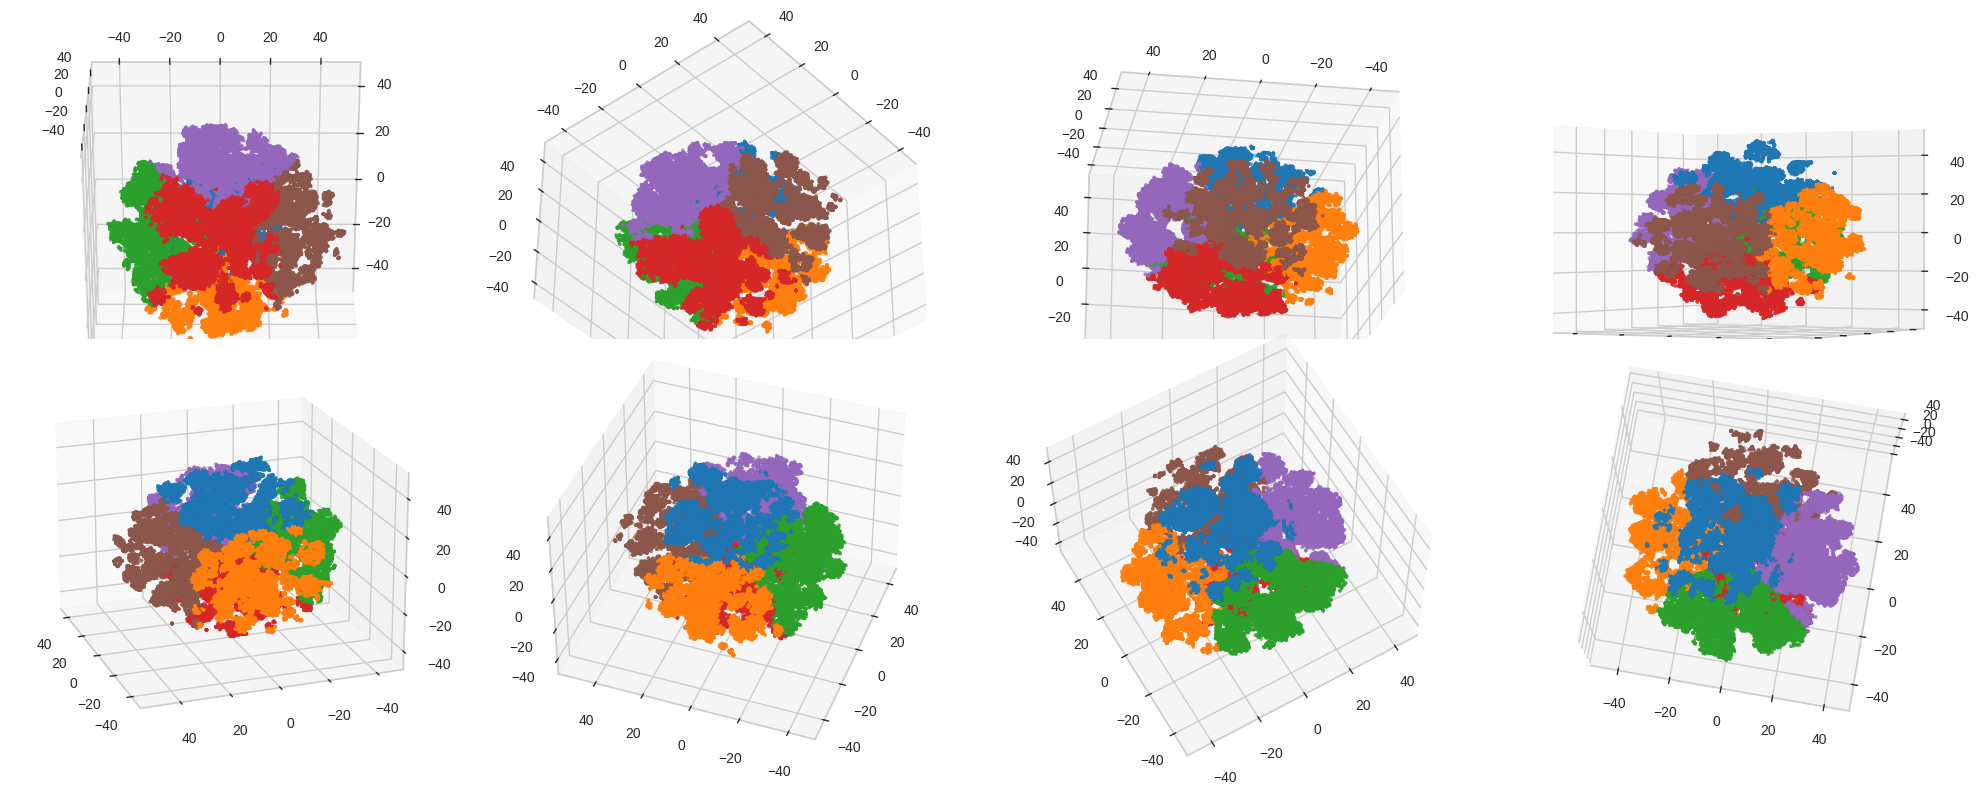

In [67]:
%matplotlib inline
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Create figure and axes
fig = plt.figure()
fig.set_size_inches(25, 15)
ax = []
for i in range(8):
    if i<4:
        ax.append(fig.add_subplot(1, 4, i+1, projection='3d'))
    else:
        ax.append(fig.add_subplot(2, 4, i+1, projection='3d'))

# Create a list of colors from the Matplotlib "Set1" palette
set1_colors = list(mcolors.TABLEAU_COLORS.values())[:10]

# Create a dictionary to map colors to values from the list
color_dict = {i: set1_colors[i] for i in range(len(set1_colors))}


# Plot the 3D scatter plot from different angles

for i in range(8):
    ax[i].scatter3D(tsne_value[:,0],tsne_value[:,1],tsne_value[:,2],marker=".",c=[color_dict[i] for i in df["label"]])
    ax[i].view_init(elev=i*20-60., azim=i*40)
plt.show()

In [54]:
result = df.groupby(['label']).mean()
result

/tmp/ipykernel_14822/825856455.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,nb_items_total,montant_total,nb_commande,mean_review_score,mean_payment_installments,mean_length_comment_title,mean_length_comment_message,mean_distance,recence,med_product_photos_qty,med_product_description_lenght
label,,,,,,,,,,,
0,1.194525,151.215707,1.020810,3.857055,2.790698,1.363330,42.750576,5.374977,312.669650,2.127620,567.599053
1,1.158989,141.990322,1.004354,3.907034,1.208567,1.541538,33.655676,5.730762,297.685744,2.315379,823.007022
2,1.057031,153.239053,1.000000,4.389498,3.067432,0.437429,14.033009,5.543470,294.419512,2.154872,742.604171
3,1.048539,153.703659,1.002759,4.429972,2.999373,1.471822,17.151344,5.895273,280.092249,2.415559,911.877806
4,1.199059,187.299651,1.000000,4.017189,4.070201,0.553199,25.118632,5.601638,320.387453,2.274404,742.160602
5,1.441886,201.088796,1.173003,4.057594,3.136163,2.934798,34.994341,5.362999,254.068831,2.024560,892.571511


In [55]:
import plotly.graph_objects as go

categories = result.columns
fig = go.Figure()

for g in result.index:
    fig.add_trace(go.Scatterpolar(
        r = result.loc[g].values,
        theta = categories,
        fill = 'toself',
        name = f'cluster #{g}'
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5] # here we can define the range
    )),
  showlegend=True,
    title="Issues with Plotly",
    title_x=0.5
)

fig.show()

In [56]:
test

NameError: name 'test' is not defined

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,FunctionTransformer
from sklearn.pipeline import Pipeline


std = StandardScaler()

log_1p = FunctionTransformer(func=np.log1p)
preprocessor_pca = ColumnTransformer(
    transformers=[
        ("log",log_1p,num_columns)
    ]
    
)
pipe=Pipeline([
     ('preprocessor', preprocessor_pca),
     ('std', std )
])



In [59]:
from kmodes.kprototypes import KPrototypes
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

model_Kproto = KPrototypes(n_clusters=6, init="Cao", verbose=2, n_jobs=-1, n_init=8, random_state=42)
df_std = df.copy()
df_std[num_columns] = pipe.fit_transform(df[num_columns])
model_Kproto.fit_predict(df_std, categorical = catColumnsPos)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Run: 3, iteration: 1/100, moves: 40550, ncost: 880460.0334041967
Run: 1, iteration: 1/100, moves: 28407, ncost: 876355.203336297
Run: 6, iteration: 1/100, moves: 29527, ncost: 895758.835266178
Run: 4, iteration: 1/100, moves: 33423, ncost: 862997.1869574582
Run: 7, iteration: 1/100, 

array([1, 2, 0, ..., 2, 1, 2], dtype=uint16)

In [60]:
# Add the cluster to the dataframe
df_kproto= df.copy()
df_kproto['label'] = model_Kproto.labels_

{0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b', 6: '#e377c2', 7: '#7f7f7f', 8: '#bcbd22', 9: '#17becf'}


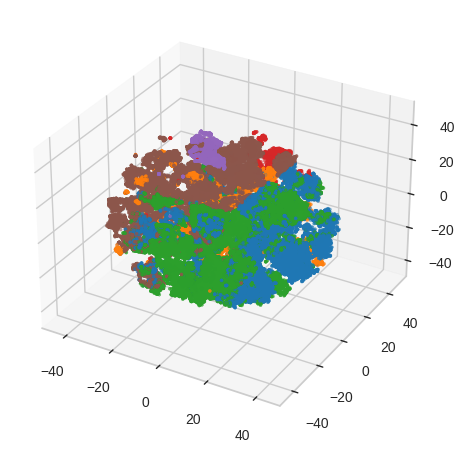

In [61]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.colors as mcolors

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Créer une liste de couleurs à partir de la palette "Set1" de Matplotlib
set1_colors = list(mcolors.TABLEAU_COLORS.values())[:10]

# Créer un dictionnaire pour mapper des couleurs aux valeurs de la liste
color_dict = {i: set1_colors[i] for i in range(len(set1_colors))}


ax.scatter3D(tsne_value[:,0],tsne_value[:,1],tsne_value[:,2],marker=".",c=[color_dict[i] for i in df_kproto["label"]])
plt.show()

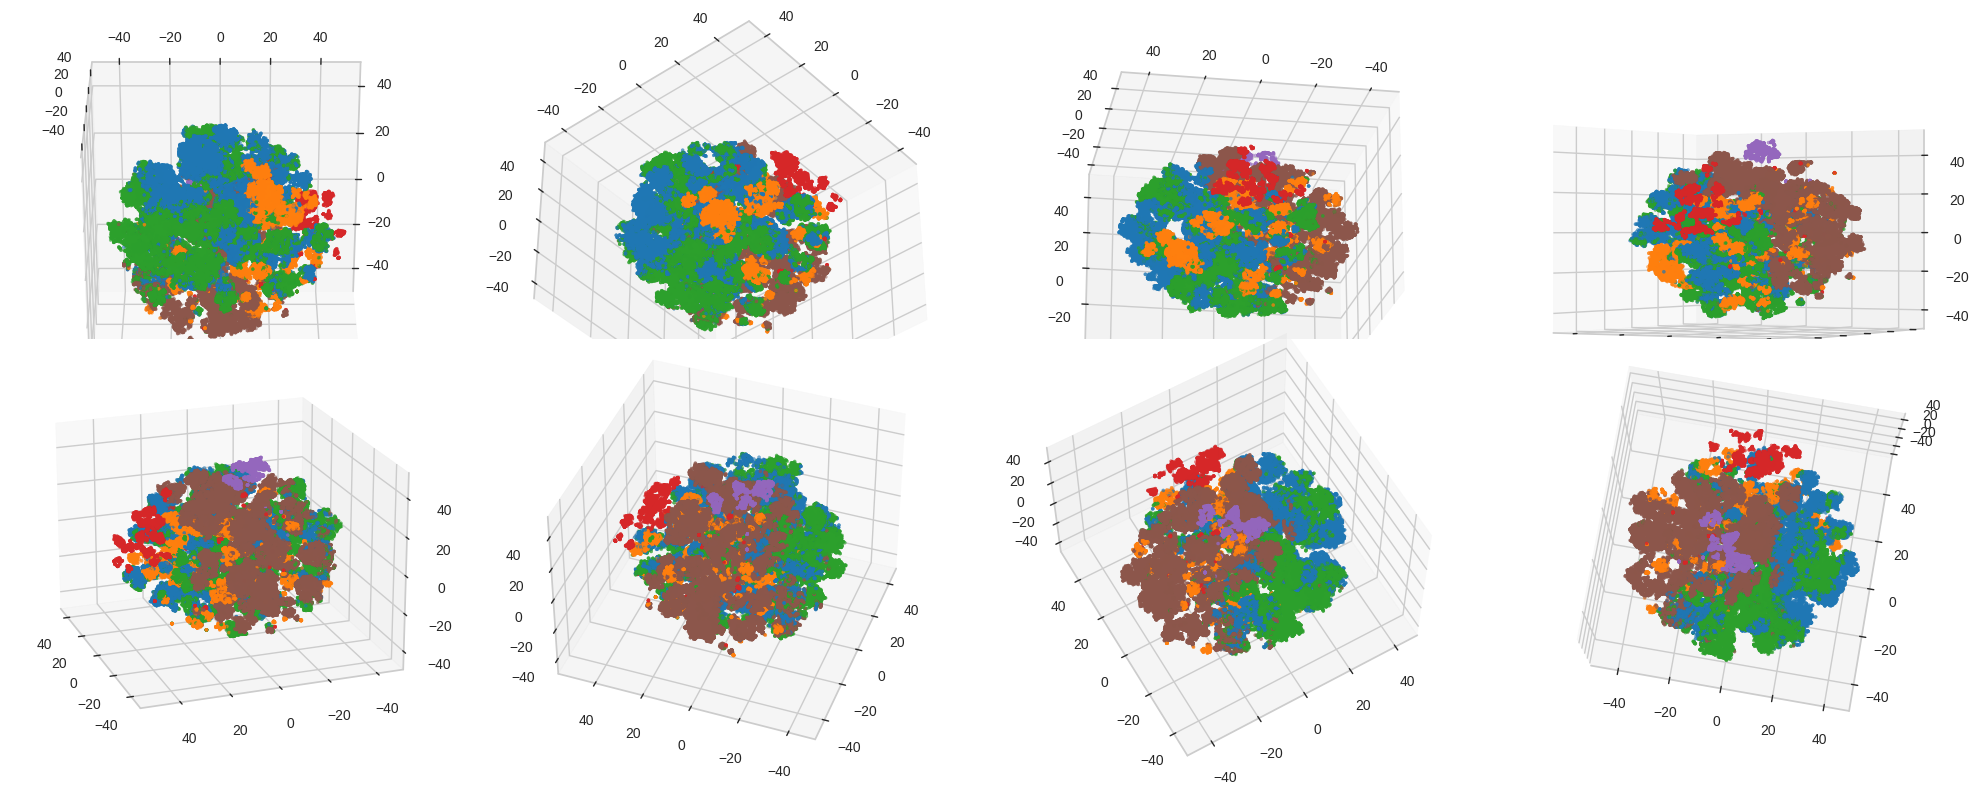

In [66]:
%matplotlib inline
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Create figure and axes
fig = plt.figure()
fig.set_size_inches(25, 15)
ax = []
for i in range(8):
    if i<4:
        ax.append(fig.add_subplot(1, 4, i+1, projection='3d'))
    else:
        ax.append(fig.add_subplot(2, 4, i+1, projection='3d'))

# Create a list of colors from the Matplotlib "Set1" palette
set1_colors = list(mcolors.TABLEAU_COLORS.values())[:10]

# Create a dictionary to map colors to values from the list
color_dict = {i: set1_colors[i] for i in range(len(set1_colors))}


# Plot the 3D scatter plot from different angles

for i in range(8):
    ax[i].scatter3D(tsne_value[:,0],tsne_value[:,1],tsne_value[:,2],marker=".",c=[color_dict[i] for i in df_kproto["label"]])
    ax[i].view_init(elev=i*20-60., azim=i*40)
plt.show()

In [62]:
result_kprot = df.groupby(['label']).mean()
result_kprot

/tmp/ipykernel_14822/3786504865.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,nb_items_total,montant_total,nb_commande,mean_review_score,mean_payment_installments,mean_length_comment_title,mean_length_comment_message,mean_distance,recence,med_product_photos_qty,med_product_description_lenght
label,,,,,,,,,,,
0,1.194525,151.215707,1.020810,3.857055,2.790698,1.363330,42.750576,5.374977,312.669650,2.127620,567.599053
1,1.158989,141.990322,1.004354,3.907034,1.208567,1.541538,33.655676,5.730762,297.685744,2.315379,823.007022
2,1.057031,153.239053,1.000000,4.389498,3.067432,0.437429,14.033009,5.543470,294.419512,2.154872,742.604171
3,1.048539,153.703659,1.002759,4.429972,2.999373,1.471822,17.151344,5.895273,280.092249,2.415559,911.877806
4,1.199059,187.299651,1.000000,4.017189,4.070201,0.553199,25.118632,5.601638,320.387453,2.274404,742.160602
5,1.441886,201.088796,1.173003,4.057594,3.136163,2.934798,34.994341,5.362999,254.068831,2.024560,892.571511


In [63]:
import plotly.graph_objects as go

categories = result_kprot.columns
fig = go.Figure()

for g in result_kprot.index:
    fig.add_trace(go.Scatterpolar(
        r = result_kprot.loc[g].values,
        theta = categories,
        fill = 'toself',
        name = f'cluster #{g}'
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5] # here we can define the range
    )),
  showlegend=True,
    title="Issues with Plotly",
    title_x=0.5
)

fig.show()

In [71]:
df.to_csv("data/df_tsne_comp3_kmean.csv",index=False)
df_kproto.to_csv("data/df_tsne_comp3_kproto.csv",index=False)
